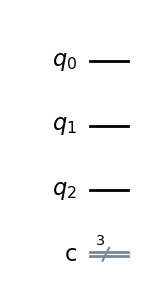

In [1]:
from qiskit import QuantumCircuit
import numpy as np

# Create a 3-qubit circuit
qc = QuantumCircuit(3, 3)

qc.draw(output="mpl")


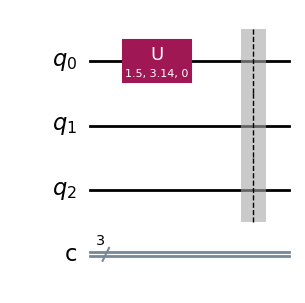

In [2]:
theta = 1.5
varphi = 3.142

# Create the unknown state to be teleported using the u-gate.
qc.u(theta, varphi, 0.0, 0)

qc.barrier()

qc.draw(output="mpl")

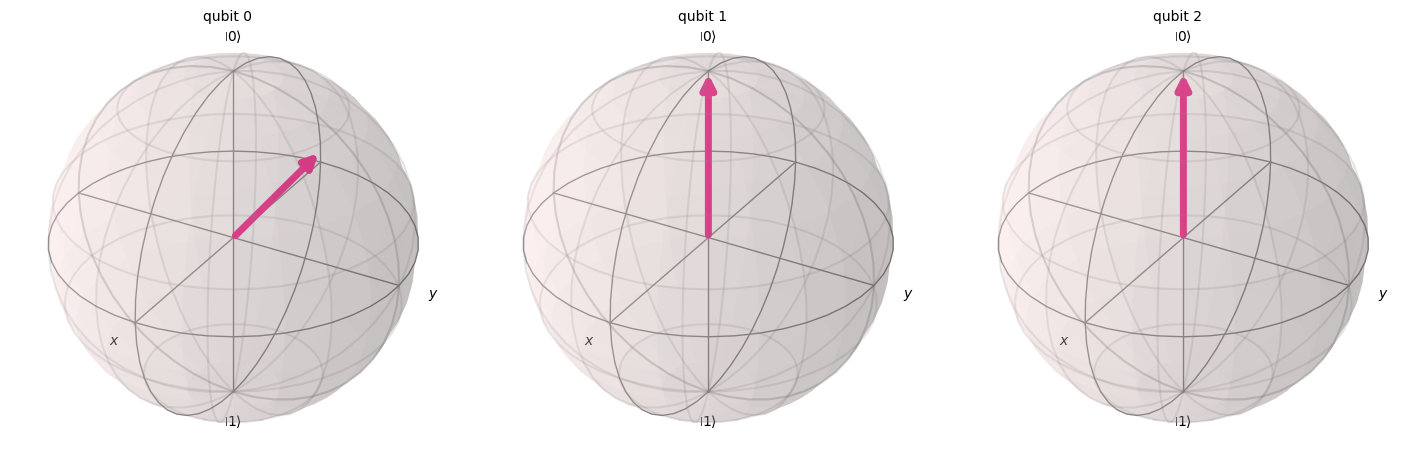

In [3]:

# Show the quantum state on a bloch sphere
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

out_vector = Statevector(qc)

plot_bloch_multivector(out_vector)

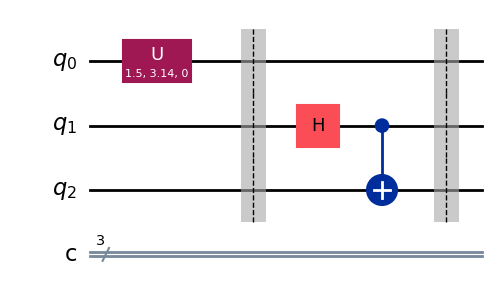

In [ ]:
# Initialize the entangled pair to be used for teleportation
qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.draw(output="mpl")

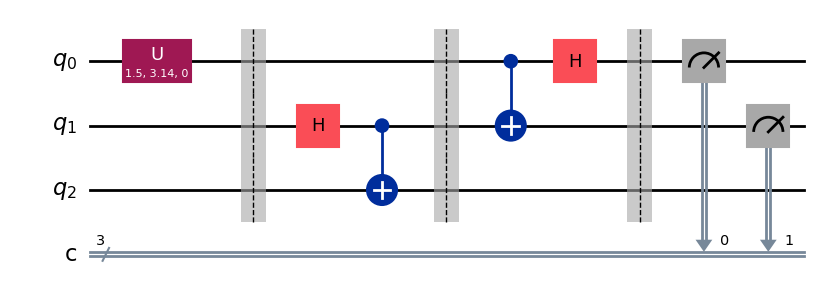

In [ ]:
# Implement the teleportation protocol
# Use the CNOT gate and H gate to entangle the unknown state with state of qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measure the two qubits
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output="mpl")



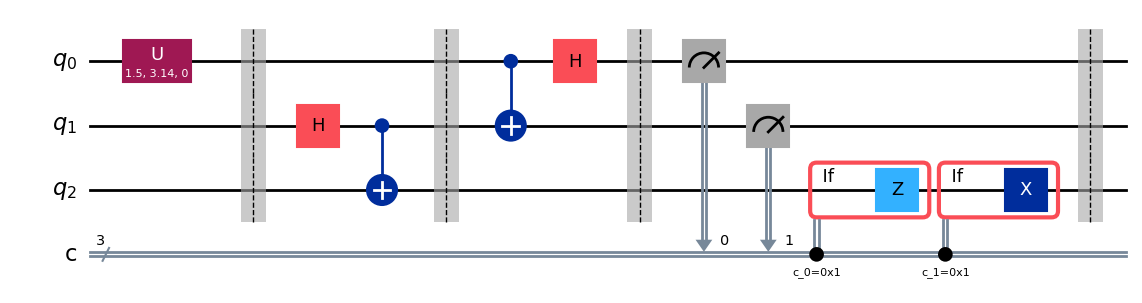

In [6]:
# Apply corrections on Bob's end based on results of Alice's measurement
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)
qc.barrier()

qc.draw(output="mpl")

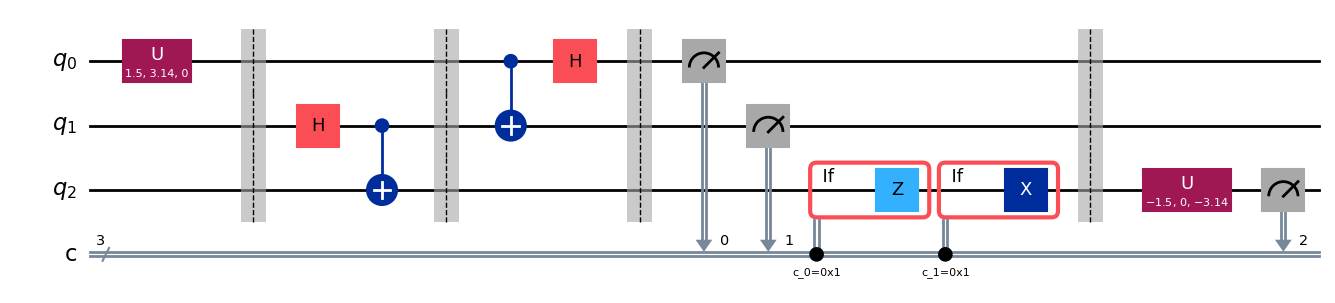

In [7]:
# Apply the inverse of u-gate to verify state
qc.u(theta, varphi, 0.0, 2).inverse()
qc.measure(2, 2)

qc.draw(output="mpl")
